# Shanoon Diversity Test

##  This is the way to import data from a .csv file into Pyhton's environment usin the command read_csv().

In [5]:
import pandas as pd

def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [6]:
# Path to the file to be imported
path = "../data/aedes.csv"

# Import the file
aedes_df = import_csv(path)

Now we can obtain statiscal summary of each numerical variable. The simplest way to do this task is
using the command .describe(). We only have to define the variable containg the values we are interested in.
For example, suppose we want to now the basic statistics of the mosquito abundance, which is contained in a variable
called "count".

In [7]:
aedes_df["count"].describe()

count    864.000000
mean      23.151620
std       63.217306
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      467.000000
Name: count, dtype: float64

Now, suppose we want to get a statistical summary but by variable levels or groups. In this case we have to use
the command .groupby("grouping variable")["numerical variabe"], adding a the end of the line the command we used before.

In [8]:
aedes_df.groupby("season")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
dry,108.0,38.546296,101.815518,0.0,0.0,0.0,0.0,467.0
norte,540.0,20.975926,56.485319,0.0,0.0,0.0,2.0,335.0
rainy,216.0,20.893519,52.417401,0.0,0.0,0.0,2.0,261.0


We can visualize this data using Seaborn and Matplotlib.
Suposse we want to create a boxplot by season...

<function matplotlib.pyplot.show(close=None, block=None)>

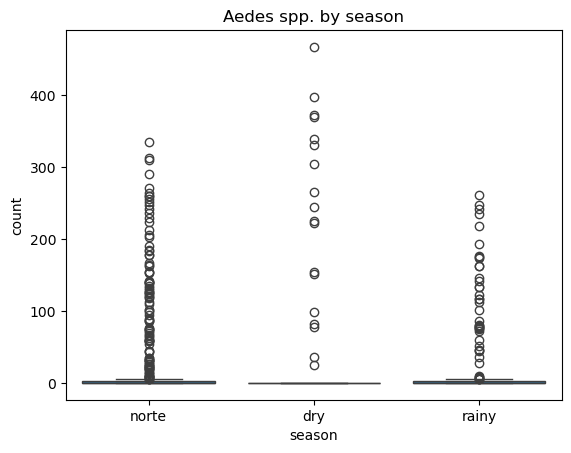

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="season", y="count", data= aedes_df)
plt.title("Aedes spp. by season")
plt.show

Alternatively we can use a violin plot.

<function matplotlib.pyplot.show(close=None, block=None)>

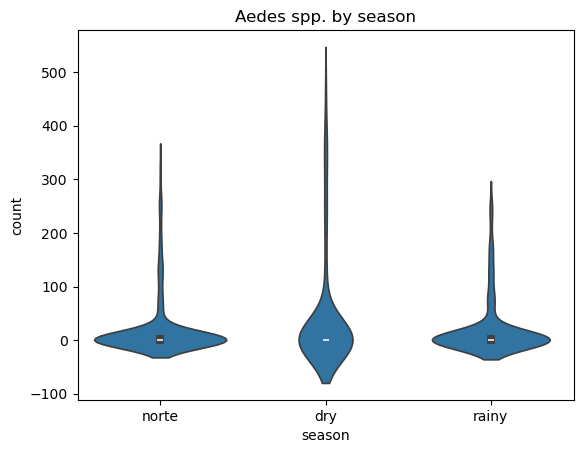

In [10]:
sns.violinplot(x="season", y="count", data= aedes_df)
plt.title("Aedes spp. by season")
plt.show

To estimate Shannon diversity index we need to define a function that creates the needed variables.
First we need the numpy and scipy.stats libraries from which we will import the function entropy.

In [11]:
import numpy as np
from scipy.stats import entropy

Then, we define the function that will estimate de Shannon index as well as spcies richness, total abundance and
the Pileous's eveness index.

In [12]:
def detailed_shannon(group):
    total = group["count"].sum()
    props = group["count"] / total
    props = props[props > 0]
    shannon = -sum(props * np.log(props))

    return pd.Series({
        "Richness": group["species"].nunique(),
        "Total abundance": total,
        "Shannon": shannon,
        "Evenness": shannon / np.log(len(props)) if len(props) > 0 else 0
    })


results = (
    aedes_df.drop(columns="season")
    .groupby(aedes_df["season"], group_keys=False)
    .apply(detailed_shannon)
)

Finally we can plot the estimated Shannon diversity by grouping variable ("season").

<function matplotlib.pyplot.show(close=None, block=None)>

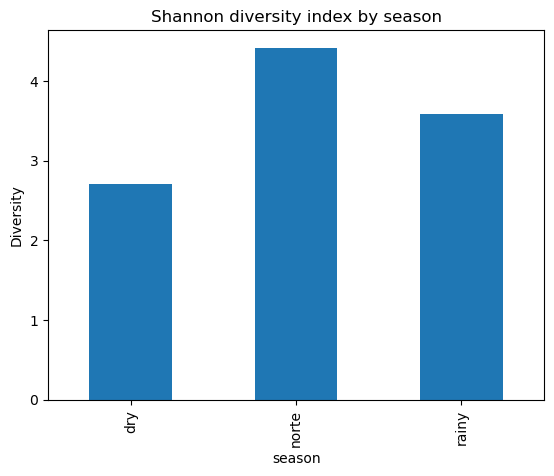

In [13]:
results.reset_index().plot.bar(x="season", y="Shannon", legend=False)
plt.title("Shannon diversity index by season")
plt.ylabel("Diversity")
plt.show

#### This code was crated by Canales-Delgadillo J. C. : [Orcid](https://orcid.org/0000-0002-2997-7849);  [Web of science](https://www.webofscience.com/wos/author/record/AAF-2274-2020)
Datafile is part of the mosquito-diversity-isla-del-carmen Database (available at https://doi.org/10.5281/zenodo.14976364), and represents abundance records of female Aedes species collected from November 2019 to December 2020 in a mangrove – semideciduous forest patch in Isla del Carmen Campeche, Mexico.
